In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns;

In [2]:
prices_original=pd.read_csv("C:/Users/ANURAAG SHARMA T/Documents/Data Science/example_sprit_cut_prices.csv",sep=';')
prices_original.to_csv("C:/Users/ANURAAG SHARMA T/Documents/Data Science/prices_original.csv")
prices_original['DATE_CHANGED']= pd.to_datetime(prices_original['DATE_CHANGED'])
station_original=pd.read_csv("C:/Users/ANURAAG SHARMA T/Documents/Data Science/example_sprit_cut_station.csv",sep=';')
station_original.to_csv("C:/Users/ANURAAG SHARMA T/Documents/Data Science/station_original.csv")


Number of different stations: 412
Number of different brands: 56


D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

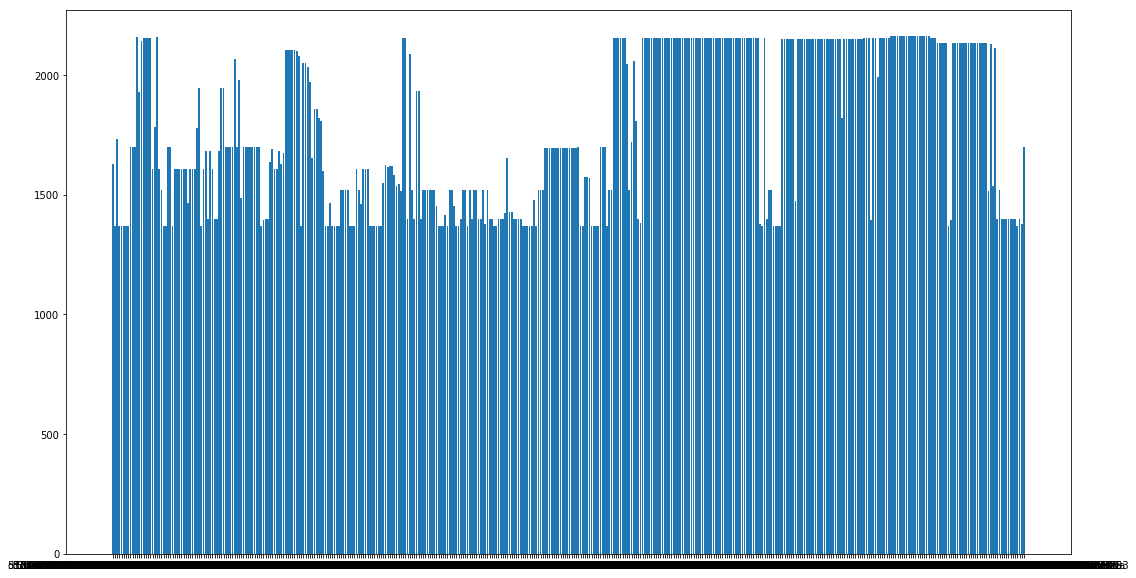

In [3]:
##1 How many different stations exist in the data set and what is the existing history in days (bar chart)?
print("Number of different stations:",len(station_original.ID.unique()))
print("Number of different brands:",len(station_original.BRAND.unique()))
df1=station_original.drop_duplicates(subset=['ID'])
df1['VERSION_TIME']= pd.to_datetime(df1['VERSION_TIME'])
df1['today']=pd.datetime.now()
df1['Age_in_days']=[int(i.days) for i in (df1['today']-df1['VERSION_TIME'])]
ax = plt.subplots(figsize=(18,10))
plt.bar(df1['ID'],df1['Age_in_days'])
plt.show()


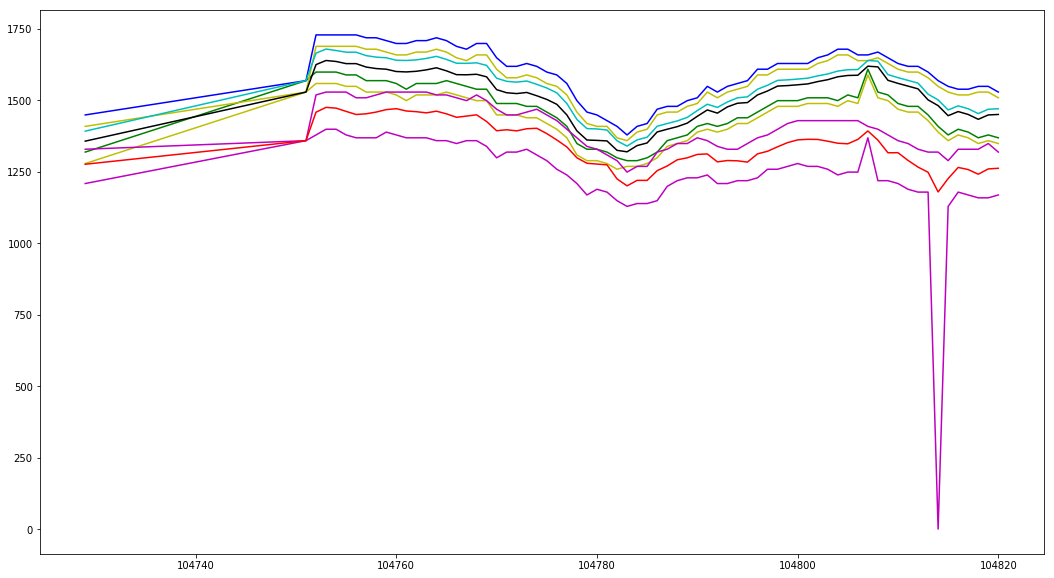

In [4]:
##2 What is the min, mean, max price for each gasoline type and station weekly (time series graph)
df2=prices_original.copy()
df2['week_of_year']=[int(i.weekofyear) for i in (df2['DATE_CHANGED'])]
df2['year']=[int(i.year) for i in (df2['DATE_CHANGED'])]
df2['week']=(df2['year']*52)+df2['week_of_year']
df_2=pd.DataFrame()
df_2_filter=df2.groupby(['STID','week'],as_index=False)
df_2=pd.DataFrame(list(df_2_filter.groups.keys()), columns =['STID','week'])
df_2['E5_min']=df_2_filter['E5'].min()['E5']
df_2['E5_max']=df_2_filter['E5'].max()['E5']
df_2['E5_mean']=df_2_filter['E5'].mean()['E5']
df_2['E10_min']=df_2_filter['E10'].min()['E10']
df_2['E10_max']=df_2_filter['E10'].max()['E10']
df_2['E10_mean']=df_2_filter['E10'].mean()['E10']
df_2['DIESEL_min']=df_2_filter['DIESEL'].min()['DIESEL']
df_2['DIESEL_max']=df_2_filter['DIESEL'].max()['DIESEL']
df_2['DIESEL_mean']=df_2_filter['DIESEL'].mean()['DIESEL']
ax = plt.subplots(figsize=(18,10))
#min for STID='ff719585-52e4-40f3-a217-2e1b5a5c5633'
plt.plot(df_2['week'][28473:],df_2['E5_min'][28473:],'g-')
plt.plot(df_2['week'][28473:],df_2['E10_min'][28473:],'y-')
plt.plot(df_2['week'][28473:],df_2['DIESEL_min'][28473:],'m-')
#max for STID='ff719585-52e4-40f3-a217-2e1b5a5c5633'
plt.plot(df_2['week'][28473:],df_2['E5_max'][28473:],'b-')
plt.plot(df_2['week'][28473:],df_2['E10_max'][28473:],'y-')
plt.plot(df_2['week'][28473:],df_2['DIESEL_max'][28473:],'m-')
#mean for STID='ff719585-52e4-40f3-a217-2e1b5a5c5633'
plt.plot(df_2['week'][28473:],df_2['E5_mean'][28473:],'c-')
plt.plot(df_2['week'][28473:],df_2['E10_mean'][28473:],'k-')
plt.plot(df_2['week'][28473:],df_2['DIESEL_mean'][28473:],'r-')


Minimum price is : 403.0  and is at station :  9ddfa98a-e5ff-4118-998d-0fda78318b3c


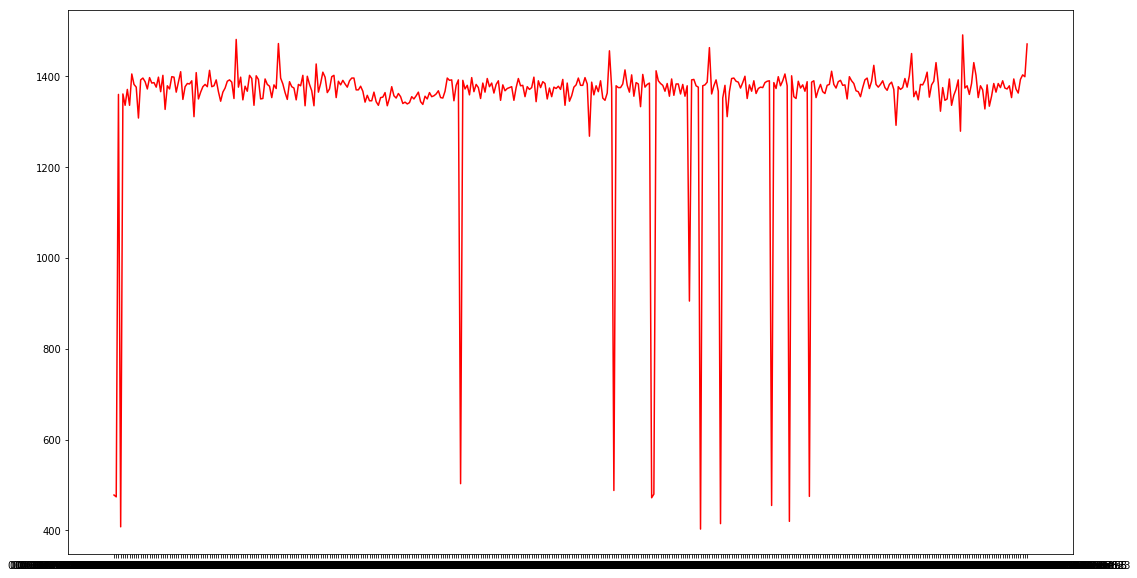

In [5]:
##3. What is cheapest station (in average) and why?
df3=prices_original.copy()
df_3=pd.DataFrame()
df_3_filter=df3.groupby('STID',as_index=False)
df_3=pd.DataFrame(list(df_3_filter.groups.keys()), columns =['STID'])
df_3['Average_price']=(df_3_filter['E5'].mean()['E5']+df_3_filter['E10'].mean()['E10']+df_3_filter['DIESEL'].mean()['DIESEL'])//3
ax = plt.subplots(figsize=(18,10))
plt.plot(df_3['STID'],df_3['Average_price'],'r-')
print("Minimum price is :",df_3['Average_price'].min()," and is at station : ",df_3['STID'][df_3['Average_price'].idxmin()])

Minimum price is : 1359.0  and the day is :  Friday


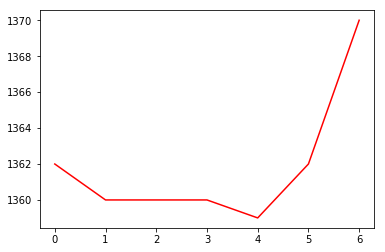

In [6]:
##4. At which day of a weak is the price most likely the cheapest (week profile)
df4=prices_original.copy()
df4['day_of_week']=[int(i.weekday()) for i in (df4['DATE_CHANGED'])]
df_4=pd.DataFrame()
df_4_filter=df4.groupby('day_of_week',as_index=False)
df_4=pd.DataFrame(list(df_4_filter.groups.keys()), columns =['day_of_week'])
df_4['Average_price']=(df_4_filter['E5'].mean()['E5']+df_4_filter['E10'].mean()['E10']+df_4_filter['DIESEL'].mean()['DIESEL'])//3
plt.plot(df_4['day_of_week'],df_4['Average_price'],'r-')
weekday={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
print("Minimum price is :",df_4['Average_price'].min()," and the day is : ",weekday[df_4['Average_price'].idxmin()])

Minimum price is : 1307.0  and the hour is :  14


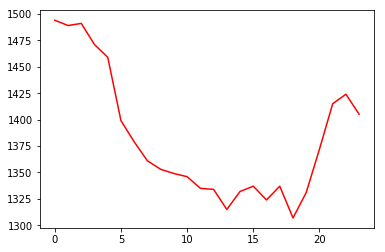

In [7]:
##5. At which hour during a day is the price the cheapest in average (hour profile)
df5=prices_original.copy()
df5['hour_of_day']=[int(i.hour) for i in (df5['DATE_CHANGED'])]
df_5=pd.DataFrame()
df_5_filter=df5.groupby('hour_of_day',as_index=False)
df_5=pd.DataFrame(list(df_5_filter.groups.keys()), columns =['hour_of_day'])
df_5['Average_price']=(df_5_filter['E5'].mean()['E5']+df_5_filter['E10'].mean()['E10']+df_5_filter['DIESEL'].mean()['DIESEL'])//3
plt.plot(df_5['hour_of_day'],df_5['Average_price'],'r-')
print("Minimum price is :",df_5['Average_price'].min()," and the hour is : ",df5['hour_of_day'][df_5['Average_price'].idxmin()])

Number of different station locations: 410


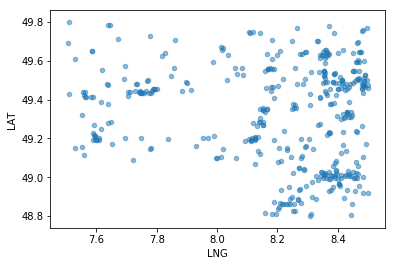

In [8]:
##6. How many different station locations are present in the data (visualize via a map)
df_6=station_original.drop_duplicates(subset=['LAT','LNG'])
print("Number of different station locations:",len(df_6.ID.unique()))
df_6.plot(kind="scatter", x="LNG", y="LAT", alpha=0.5)
plt.show()


Station which has most price data points is:5374ea5c-bf3e-4b0a-8504-049368adcdba


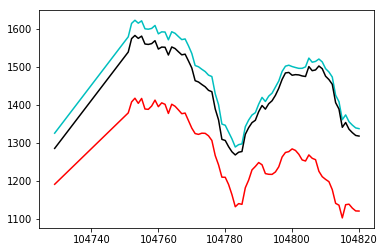

In [9]:
#7. What is the gas station which has most price data points, choose one and draw the time series for all 3 gasonline types
df7=prices_original.copy()
most_price_data_points_station=df7.STID.value_counts().idxmax()
print("Station which has most price data points is:"+most_price_data_points_station)
df7=df7[df7['STID']==most_price_data_points_station]
df7['week_of_year']=[int(i.weekofyear) for i in (df7['DATE_CHANGED'])]
df7['year']=[int(i.year) for i in (df7['DATE_CHANGED'])]
df7['week']=(df7['year']*52)+df7['week_of_year']
df_7=pd.DataFrame()
df_7_filter=df7.groupby(['STID','week'],as_index=False)
df_7=pd.DataFrame(list(df_7_filter.groups.keys()), columns =['STID','week'])
df_7['E5_mean']=df_7_filter['E5'].mean()['E5']
df_7['E10_mean']=df_7_filter['E10'].mean()['E10']
df_7['DIESEL_mean']=df_7_filter['DIESEL'].mean()['DIESEL']
plt.plot(df_7['week'],df_7['E5_mean'],'c-')
plt.plot(df_7['week'],df_7['E10_mean'],'k-')
plt.plot(df_7['week'],df_7['DIESEL_mean'],'r-')

In [10]:
##8. At which hour during a day do we have the most price changes
df8=prices_original.copy()
df8['hour_of_day']=[int(i.hour) for i in (df8['DATE_CHANGED'])]
most_price_data_points_hour=df8['hour_of_day'].value_counts().idxmax()
print("Hour which has most price changes is:"+str(most_price_data_points_hour))

Hour which has most price changes is:12


D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

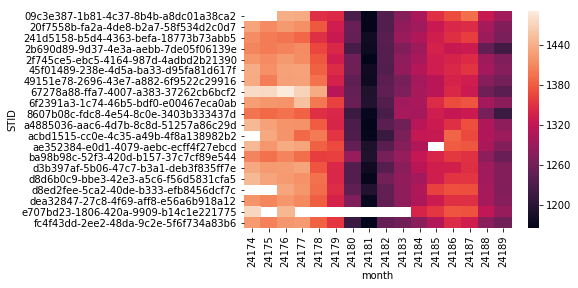

In [11]:
##9. Select 20 gas stations having the longest time history and visualize the average price per month. Use heatmap and only the prices between 12:00-13:00 of e10 and diesel.
df9=station_original.drop_duplicates(subset=['ID'])
df9['VERSION_TIME']= pd.to_datetime(df9['VERSION_TIME'])
df9['today']=pd.datetime.now()
df9['Age_in_days']=[int(i.days) for i in (df9['today']-df9['VERSION_TIME'])]
df9=df9.sort_values(by=['Age_in_days'],ascending=0)[:20]
df_9=prices_original.copy()
list_of_stations=list(df9['ID'])
df_9=df_9[df_9['STID'].isin(list_of_stations)]
df_9['month_of_year']=[int(i.month) for i in (df_9['DATE_CHANGED'])]
df_9['year']=[int(i.year) for i in (df_9['DATE_CHANGED'])]
df_9['month']=(df_9['year']*12)+df_9['month_of_year']
df_9['hour']=[int(i.hour) for i in (df_9['DATE_CHANGED'])]
df_9=df_9[df_9['hour']==12]
df_9_final=pd.DataFrame()
df_9_filter=df_9.groupby(['STID','month'],as_index=False)
df_9_final=pd.DataFrame(list(df_9_filter.groups.keys()), columns =['STID','month'])
df_9_final['Average_Price']=(df_9_filter['E10'].mean()['E10']+df_9_filter['DIESEL'].mean()['DIESEL'])/2
df_9_final = df_9_final.pivot("STID", "month", "Average_Price")
sns.heatmap(df_9_final)

In [22]:
#10. Describe a possible business potential in € for the customer .Define the constraints of the business case.

print("Based on the above results, we can conclude that:\n"
    "* There are total 412 distinct stations available in the data set and have been running from many days.\n\n"

"To get the maximum profits, a company should:\n"
 "   * Fill fuel at 14:00\n"
 "   * On Friday's.\n"
 "   * And avoid filling fuel at 12:00 as there will be high shanges in fuel prices in a day!\n\n"

"Apart from that, people who are using E10 and Diesel will have high prices from the month of April to June and will have the"
"cheapest prices for their fuels from September to December. But the lowest prices will mainly be in the month of November.")




Based on the above results, we can conclude that:
* There are total 412 distinct stations available in the data set and have been running from many days.

To get the maximum profits, a company should:
   * Fill fuel at 14:00
   * On Friday's.
   * And avoid filling fuel at 12:00 as there will be high shanges in fuel prices in a day!

Apart from that, people who are using E10 and Diesel will have high prices from the month of April to June and will have thecheapest prices for their fuels from September to December. But the lowest prices will mainly be in the month of November.
